In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

https://www.kaggle.com/kumarajarshi/life-expectancy-who

In [2]:
data = pd.read_csv('Life Expectancy Data.csv')

In [3]:
data = pd.read_csv('Life Expectancy Data.csv')
data.drop(['Country'], axis=1, inplace = True)
data.loc[data['Status']=='Developing', 'Status'] = 0
data.loc[data['Status']=='Developed', 'Status'] = 1
data.dropna(inplace=True)
X = data.drop(['Life expectancy '],axis=1)
y = data['Life expectancy ']
data.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Zadanie
Przeprowadź kompletny proces modelowania. Wypróbuj różne transformacje zmiennch i metrody regularyzacji. Przetestuj model na części testowej. Przedstaw wyniki w formie liczbowej i wizualnej.

In [4]:
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet, Ridge, Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 720x720 with 0 Axes>

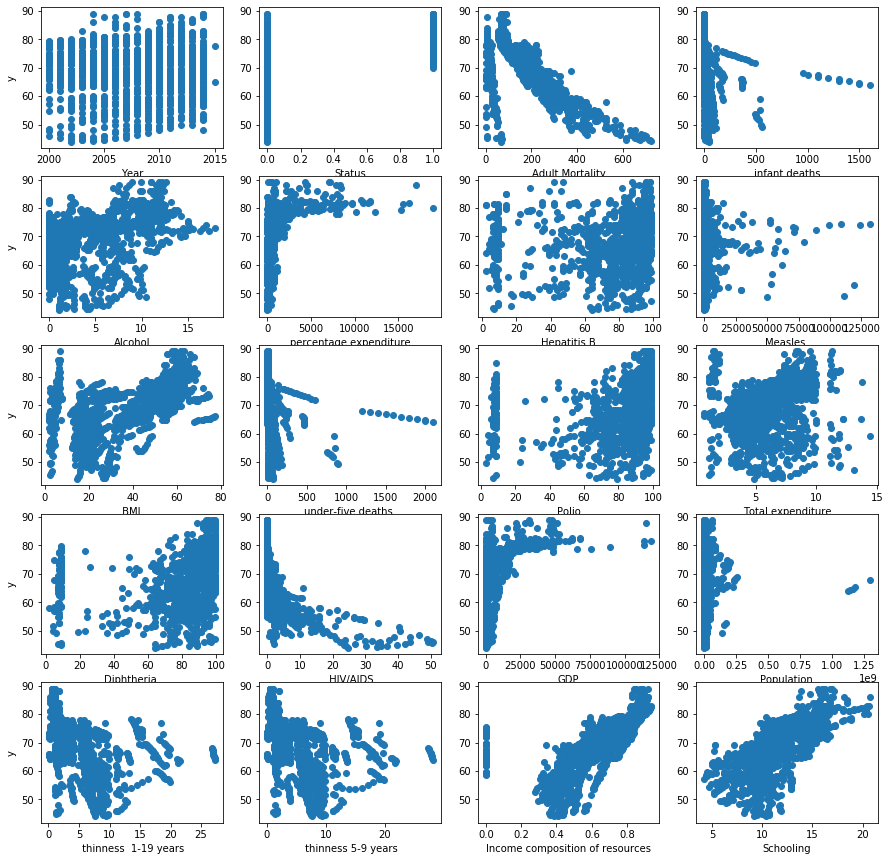

In [5]:
plt.figure(figsize=[10,10])
fig, axs = plt.subplots(5, 4,figsize=[15,15])

for i in range(5):
    axs[i][0].set_ylabel('y')
    for j in range(4):
        axs[i][j].plot(X.iloc[:,i*4+j], y, 'o')
        axs[i][j].set_xlabel(X.columns[i*4+j])

In [6]:
pipeline = make_pipeline(StandardScaler(),Ridge())
pipeline.fit(X_train,y_train)
print(pipeline.score(X_train,y_train))
print(pipeline.score(X_test,y_test))

0.8471304445055935
0.8091171368586287


In [7]:
from sklearn import  metrics
y_pred_train = pipeline.predict(X_train)
y_pred_test =  pipeline.predict(X_test)

print("Mean absolute errors train data: {}".format(metrics.mean_absolute_error(y_train, y_pred_train)))
print("Mean absolute errors test data: {}".format(metrics.mean_absolute_error(y_test, y_pred_test)))
print("Mean squared error train data: {}".format(metrics.mean_squared_error(y_train, y_pred_train)))
print("Mean squared error test data: {}".format(metrics.mean_squared_error(y_test, y_pred_test)))
print("Median absolute error train data: {}".format(metrics.median_absolute_error(y_train, y_pred_train)))
print("Median absolute error test data: {}".format(metrics.median_absolute_error(y_test, y_pred_test)))

Mean absolute errors train data: 2.6716338187112467
Mean absolute errors test data: 2.8497557969627554
Mean squared error train data: 12.197571772074454
Mean squared error test data: 13.656390065279956
Median absolute error train data: 2.1414162756921797
Median absolute error test data: 2.2725452332635143


In [16]:
def Error_table(mdl, X_train, X_test, y_train, y_test):
    y_train_pred = mdl.predict(X_train)
    y_test_pred = mdl.predict(X_test)
    err_tbl = {'MAE': [metrics.mean_absolute_error(y_train, y_pred_train),metrics.mean_absolute_error(y_test, y_pred_test)],
               'MSE': [metrics.mean_squared_error(y_train, y_pred_train),metrics.mean_squared_error(y_test, y_pred_test)],
               'MedAE': [metrics.median_absolute_error(y_train, y_pred_train),metrics.median_absolute_error(y_test, y_pred_test)],
               'R2': [mdl.score(X_train,y_train),mdl.score(X_test,y_test)]}
    err_tbl = pd.DataFrame(err_tbl)
    err_tbl.index = ['train','test']
    return err_tbl
err_tbl = Error_table(pipeline, X_train, X_test, y_train, y_test)
err_tbl

,MAE,MSE,MedAE,R2
train,2.639012,11.798784,2.136361,0.852533
test,2.915131,14.603667,2.219312,0.793320


In [17]:
alpha = [0.001,0.01,0.1,1,10,100]
err_tbls = {}
for a in alpha:
    pipeline = make_pipeline(StandardScaler(),Ridge(a))
    pipeline.fit(X_train,y_train)
    err_tbls[a] = Error_table(pipeline, X_train, X_test, y_train, y_test)
    print('alpha = '+str(a))
    print(err_tbls[a])
    print()

alpha = 0.001
            MAE        MSE     MedAE        R2
train  2.639012  11.798784  2.136361  0.853106
test   2.915131  14.603667  2.219312  0.793495

alpha = 0.01
            MAE        MSE     MedAE        R2
train  2.639012  11.798784  2.136361  0.853106
test   2.915131  14.603667  2.219312  0.793497

alpha = 0.1
            MAE        MSE     MedAE        R2
train  2.639012  11.798784  2.136361  0.853096
test   2.915131  14.603667  2.219312  0.793517

alpha = 1
            MAE        MSE     MedAE        R2
train  2.639012  11.798784  2.136361  0.852533
test   2.915131  14.603667  2.219312  0.793320

alpha = 10
            MAE        MSE     MedAE        R2
train  2.639012  11.798784  2.136361  0.848167
test   2.915131  14.603667  2.219312  0.790931

alpha = 100
            MAE        MSE     MedAE        R2
train  2.639012  11.798784  2.136361  0.843678
test   2.915131  14.603667  2.219312  0.790001



In [22]:
import warnings
warnings.filterwarnings("ignore")
models = {}

In [39]:
pipeline1 = make_pipeline(PolynomialFeatures(),PowerTransformer(),StandardScaler(),Lasso())
grid1 = GridSearchCV(pipeline1,
                    param_grid={'polynomialfeatures__degree': [1, 2],
                    'lasso__alpha': [0.001,0.01, 0.1, 1,10]},
                    cv=10,
                    refit=True)
grid1.fit(X_train, y_train)
print(grid1.best_params_)
print(grid1.best_score_)
models['Lasso'] = grid1.best_estimator_

{'lasso__alpha': 0.01, 'polynomialfeatures__degree': 2}
0.9078818944423055


In [28]:
Error_table(models['Lasso'], X_train, X_test, y_train, y_test)

,MAE,MSE,MedAE,R2
train,2.639012,11.798784,2.136361,0.921941
test,2.915131,14.603667,2.219312,0.868039


In [29]:
pipeline2 = make_pipeline(PolynomialFeatures(),PowerTransformer(),StandardScaler(),Ridge())
grid2 = GridSearchCV(pipeline2,
                    param_grid={'polynomialfeatures__degree': [1, 2],
                    'ridge__alpha': [0.001,0.01, 0.1, 1,10]},
                    cv=10,
                    refit=True,
                    verbose=0)
grid2.fit(X_train, y_train)
print(grid2.best_params_)
print(grid2.best_score_)
models['Ridge'] = grid2.best_estimator_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 1}
0.9072850709916327


In [30]:
Error_table(models['Ridge'], X_train, X_test, y_train, y_test)

,MAE,MSE,MedAE,R2
train,2.639012,11.798784,2.136361,0.932547
test,2.915131,14.603667,2.219312,0.871230


In [31]:
pipeline3 = make_pipeline(PolynomialFeatures(),PowerTransformer(),StandardScaler(),ElasticNet())
grid3 = GridSearchCV(pipeline3,
                    param_grid={'polynomialfeatures__degree': [1, 2],
                    'elasticnet__alpha': [0.001,0.01, 0.1, 1,10],
                    'elasticnet__l1_ratio': [0.2, 0.5, 0.7]},
                    cv=10,
                    refit=True,
                    verbose=0)
grid3.fit(X_train, y_train)
print(grid3.best_params_)
print(grid3.best_score_)
models['ElasticNet'] = grid3.best_estimator_

{'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.7, 'polynomialfeatures__degree': 2}
0.9064402084742669


In [32]:
Error_table(models['ElasticNet'], X_train, X_test, y_train, y_test)

,MAE,MSE,MedAE,R2
train,2.639012,11.798784,2.136361,0.920846
test,2.915131,14.603667,2.219312,0.866257


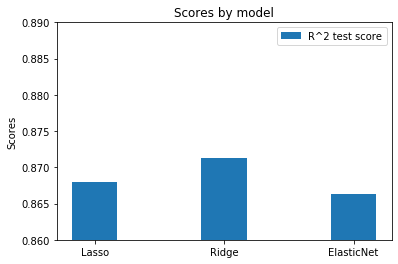

In [48]:
labels = [ 'Lasso', 'Ridge','ElasticNet']
scores = [models['Lasso'].score(X_test,y_test),models['Ridge'].score(X_test,y_test),models['ElasticNet'].score(X_test,y_test)]
width = 0.35     

fig = plt.figure()

plt.bar(labels, scores, width, label='R^2 test score')

plt.ylabel('Scores')
plt.title('Scores by model')
plt.legend()
plt.ylim([0.86,0.89])
plt.show()

In [36]:
y_pred_train = models['Lasso'].predict(X_train)
y_pred_test =  models['Lasso'].predict(X_test)

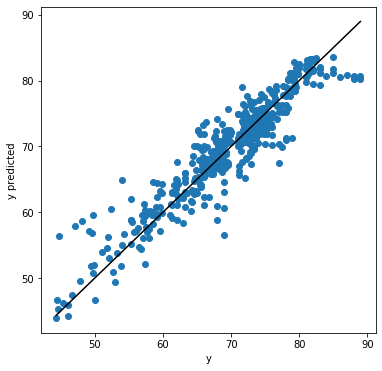

In [37]:
plt.figure(figsize=(6,6))
plt.plot(y_test,y_pred_test,'o')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'k')
plt.xlabel('y')
plt.ylabel('y predicted')
plt.show()

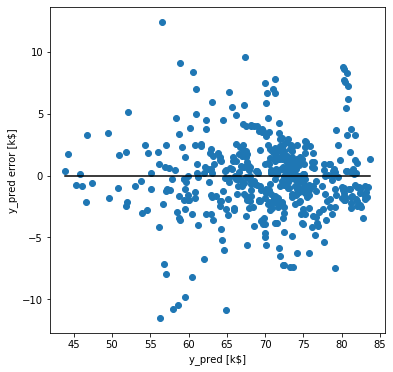

In [38]:
plt.figure(figsize=(6,6))
plt.plot(y_pred_test,(y_test-y_pred_test),'o')
plt.plot([min(y_pred_test),max(y_pred_test)],[0,0],'k')
plt.xlabel('y_pred [k$]')
plt.ylabel('y_pred error [k$]')
plt.show()

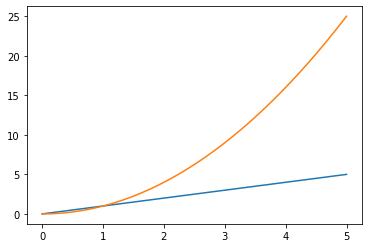

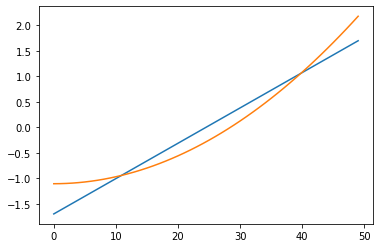

In [46]:
import scipy.stats as stats
a = np.linspace(0,5)
b = a**2
a_s = stats.zscore(a)
b_s = stats.zscore(b)
plt.plot(a,a)
plt.plot(a,b)
plt.figure()
plt.plot(a_s)
plt.plot(b_s)